#### Impedindo notebook de escrever bytecode

In [1]:
import sys
sys.dont_write_bytecode = True

#### Inserindo caminho dos módulos em sys.path

In [2]:
import pathlib
import os
sys.path.append(str(pathlib.Path(os.getcwd()).parent.parent.resolve()))

#### Importando módulos

In [3]:

from modules.point import PointDataset
from modules.classifier import ConvexHullClassifier, KNNClassifier
from random import choices
import pandas as pd
import matplotlib.pyplot as plt

#### Lendo dataset

In [4]:
dataset = PointDataset("./data.dat", labelTranslation={"negative": -1, "positive": 1})
points = dataset.getPoints()

#### Criando instância do classificador baseado em envoltória convexa para as features (0, 1)

In [5]:
CHclf = ConvexHullClassifier(points, coordinate1=0, coordinate2=1, nFolds=5)
CHresults = CHclf.run()

#### Plotando classificador

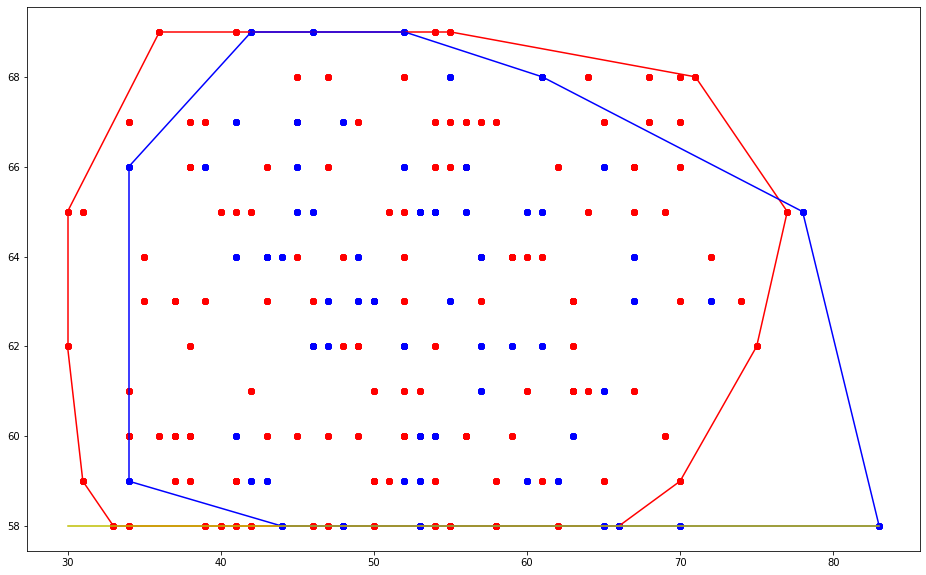

In [6]:
CHclf.plotHulls()

#### Verificando separabilidade linear dos pontos

In [7]:
CHclf.linearSeparabilityTest()

False

#### Resultados da validação cruzada com 5 folds

In [8]:
CHresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.142857,1.0,0.142857,0.142857
1,0.333333,1.0,0.333333,0.333333
2,0.285714,1.0,0.285714,0.285714
3,0.380952,1.0,0.380952,0.380952
4,0.357143,1.0,0.357143,0.357143


#### Resultados do teste

In [9]:
CHresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.184783,1.0,0.184783,0.184783


#### Criando instância do classificador KNN com otimização iterativa do número de vizinhos

A otimização é feita da seguinte forma: validação cruzada com 5 folds é executada para classificador, variando o número de vizinhos de 1 a _maxK_. É escolhido o número de vizinhos que apresenta a melhor _F1 Score_ média entre os folds. Se _makK_ não for passado, _maxK_ é igual à raíz quadrada do tamanho do dataset.

In [10]:
KNNclf = KNNClassifier(points, maxK=30, nFolds=5)
KNNresults = KNNclf.run()

/home/turi/aulas/5sem/ALG2/TP1/modules/classifier/classifier.py:61: RuntimeWarning: invalid value encountered in long_scalars
  precision: float = confusionMatrix[0][0] / \


#### Resultados da validação cruzada com 5 folds

In [11]:
KNNresults["Cross Validation Metrics"]

,Precision,Recall,F1,Accuracy
0,0.500000,0.428571,0.500000,0.833333
1,0.800000,0.266667,0.800000,0.714286
2,0.666667,0.444444,0.666667,0.833333
3,0.400000,0.181818,0.400000,0.714286
4,0.500000,0.300000,0.500000,0.761905


#### Resultados do teste

In [12]:
KNNresults["Test Metrics"]

,Precision,Recall,F1,Accuracy
0,0.5,0.275862,0.5,0.684783
